In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

### Prelim Analysis and Feature selection

In [18]:
bikes=pd.read_csv('hour.csv')
bikes.head()

,index,date,season,year,month,hour,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,demand
0,1,01-01-2011,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,01-01-2011,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,01-01-2011,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,01-01-2011,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,01-01-2011,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [19]:
bikes.shape

(17379, 17)

In [20]:
bikes_prep = bikes.copy()
bikes_prep = bikes_prep.drop(['index', 'date', 'casual', 'registered'], axis=1)



In [21]:
bikes_prep.head()

,season,year,month,hour,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,demand
0,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,16
1,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,40
2,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,32
3,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,13
4,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,1


In [22]:
bikes_prep.isnull().sum()

season        0
year          0
month         0
hour          0
holiday       0
weekday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
demand        0
dtype: int64

### Create pandas histogram

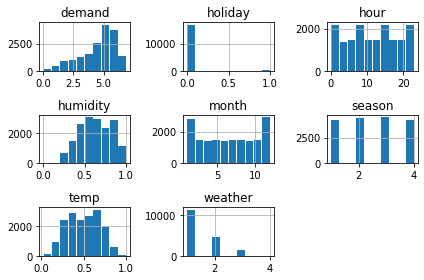

In [82]:
bikes_prep.hist(rwidth=0.9)
plt.tight_layout()

1.demand is not normally distributed so we need to plot demand with other contious variables

### Data Visualisation

#### Visualise the continuous features Vs demand

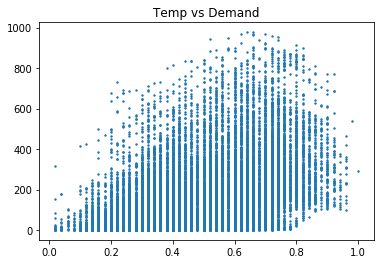

In [24]:
plt.subplot(1,1,1)
plt.title('Temp vs Demand')
plt.scatter(bikes_prep['temp'],bikes_prep['demand'],s=2)

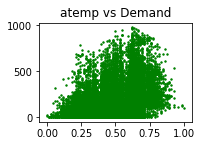

In [25]:
plt.subplot(2,2,2)
plt.title('atemp vs Demand')
plt.scatter(bikes_prep['atemp'],bikes_prep['demand'],s=2,c='g')

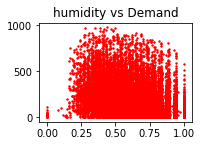

In [26]:
plt.subplot(2,2,3)
plt.title('humidity vs Demand')
plt.scatter(bikes_prep['humidity'],bikes_prep['demand'],s=2,c='r')

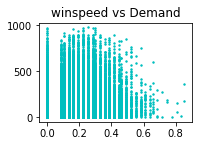

In [27]:
plt.subplot(2,2,4)
plt.title('winspeed vs Demand')
plt.scatter(bikes_prep['windspeed'],bikes_prep['demand'],s=2,c='c')


In [28]:

plt.tight_layout()

<Figure size 432x288 with 0 Axes>

#### Visualise the categorical features

<BarContainer object of 4 artists>

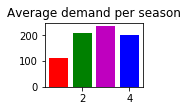

In [29]:
colors=['r','g','m','b']
plt.subplot(3,3,1)
plt.title("Average demand per season")
cat_list=bikes_prep['season'].unique()
cat_avg=bikes_prep.groupby('season').mean()['demand']
plt.bar(cat_list,cat_avg,color=colors)

<BarContainer object of 12 artists>

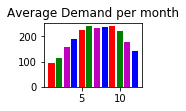

In [30]:
plt.subplot(3,3,2)
plt.title('Average Demand per month')
cat_list = bikes_prep['month'].unique()
cat_average = bikes_prep.groupby('month').mean()['demand']
plt.bar(cat_list, cat_average, color=colors)

<BarContainer object of 2 artists>

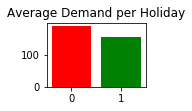

In [31]:
plt.subplot(3,3,3)
plt.title('Average Demand per Holiday')
cat_list = bikes_prep['holiday'].unique()
cat_average = bikes_prep.groupby('holiday').mean()['demand']
plt.bar(cat_list, cat_average, color=colors)


<BarContainer object of 7 artists>

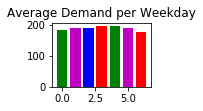

In [32]:
plt.subplot(3,3,4)
plt.title('Average Demand per Weekday')
cat_list = bikes_prep['weekday'].unique()
cat_average = bikes_prep.groupby('weekday').mean()['demand']
plt.bar(cat_list, cat_average, color=colors)


<BarContainer object of 2 artists>

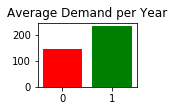

In [33]:
plt.subplot(3,3,5)
plt.title('Average Demand per Year')
cat_list = bikes_prep['year'].unique()
cat_average = bikes_prep.groupby('year').mean()['demand']
plt.bar(cat_list, cat_average, color=colors)


<BarContainer object of 24 artists>

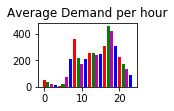

In [34]:
plt.subplot(3,3,6)
plt.title('Average Demand per hour')
cat_list = bikes_prep['hour'].unique()
cat_average = bikes_prep.groupby('hour').mean()['demand']
plt.bar(cat_list, cat_average, color=colors)

<BarContainer object of 2 artists>

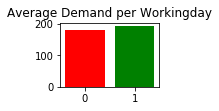

In [35]:
plt.subplot(3,3,7)
plt.title('Average Demand per Workingday')
cat_list = bikes_prep['workingday'].unique()
cat_average = bikes_prep.groupby('workingday').mean()['demand']
plt.bar(cat_list, cat_average, color=colors)


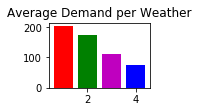

In [36]:
plt.subplot(3,3,8)
plt.title('Average Demand per Weather')
cat_list = bikes_prep['weather'].unique()
cat_average = bikes_prep.groupby('weather').mean()['demand']
plt.bar(cat_list, cat_average, color=colors)
plt.tight_layout()

### Findings
- temperature and demand have direct correlation
- plot for temp and atemp are almost identical
- Humidity and wind speed affect demand but need more statistical analysis(finding correlation)
- there is variation in demand based on 
    - season
    - month
    - holiday
    - hour
    - weather
Features to be dropped
- weekday(no significant change throughout the weekdays)
- year(we have only 2 years values so we dont know in upcoming 5-6 yrs trend)
- workingday(no significant change in weekdays or not)

In [41]:
bikes_prep['demand'].describe()

count    17379.000000
mean       189.463088
std        181.387599
min          1.000000
25%         40.000000
50%        142.000000
75%        281.000000
max        977.000000
Name: demand, dtype: float64

 50% of the data lies between 40 and 281

#### Check for outliers

In [42]:
bikes_prep['demand'].quantile([0.05,0.1,0.15,0.9,0.95,0.99])

0.05      5.00
0.10      9.00
0.15     16.00
0.90    451.20
0.95    563.10
0.99    782.22
Name: demand, dtype: float64

- 5% of the time demand of bikes is less than or equal to 5
- only 1% of the time demand was 782 
- These can be considered as outliers

Check Multiple Linear Regression Assumptions

In [45]:
correlation=bikes_prep[['temp','atemp','humidity','windspeed','demand']].corr()
correlation
# Linearity using correlation coefficient matrix using corr

,temp,atemp,humidity,windspeed,demand
temp,1.000000,0.987672,-0.069881,-0.023125,0.404772
atemp,0.987672,1.000000,-0.051918,-0.062336,0.400929
humidity,-0.069881,-0.051918,1.000000,-0.290105,-0.322911
windspeed,-0.023125,-0.062336,-0.290105,1.000000,0.093234
demand,0.404772,0.400929,-0.322911,0.093234,1.000000


- the temp and atemp have same perfect correlation and it violates multicollinearity
- the windspeed and demand have very less correlation so windspeed can be dropped
- atemp is dropped

#### Drop irrelevant features

In [46]:
bikes_prep=bikes_prep.drop(['weekday','year','workingday','atemp','windspeed'],axis=1)

In [47]:
bikes_prep.head()

,season,month,hour,holiday,weather,temp,humidity,demand
0,1,1,0,0,1,0.24,0.81,16
1,1,1,1,0,1,0.22,0.80,40
2,1,1,2,0,1,0.22,0.80,32
3,1,1,3,0,1,0.24,0.75,13
4,1,1,4,0,1,0.24,0.75,1


(array([-12, -11, -10,  -9,  -8,  -7,  -6,  -5,  -4,  -3,  -2,  -1,   0,
          1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12]),
 array([0.8793865 , 0.8795131 , 0.8797896 , 0.8806706 , 0.8828184 ,
        0.8876992 , 0.8959401 , 0.90754074, 0.9238741 , 0.9453947 ,
        0.96914285, 0.9893317 , 1.        , 0.9893317 , 0.96914285,
        0.9453947 , 0.9238741 , 0.90754074, 0.8959401 , 0.8876992 ,
        0.8828184 , 0.8806706 , 0.8797896 , 0.8795131 , 0.8793865 ],
       dtype=float32),
 <matplotlib.lines.Line2D at 0x297317eee08>)

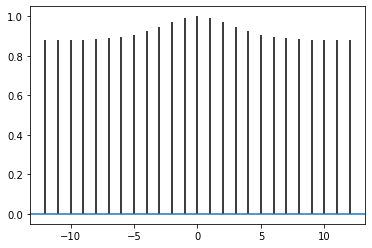

In [83]:
# Autocorrelation of demand using acor
dff1 = pd.to_numeric(bikes_prep['demand'], downcast='float')
plt.acorr(dff1, maxlags=12)

### Create/Modify new features

In [48]:
df1=bikes_prep['demand']   # Log Normalise the feature 'Demand'

In [49]:
df2=np.log(df1)

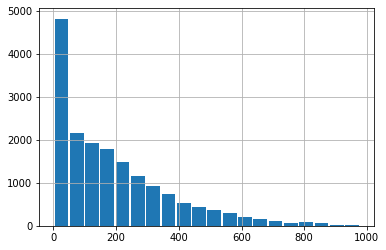

In [50]:
plt.figure()
df1.hist(rwidth=0.9,bins=20)

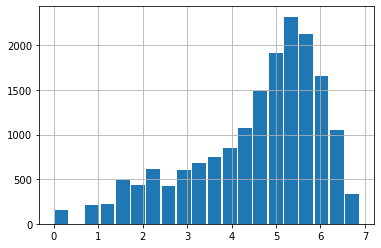

In [51]:
plt.figure()
df2.hist(rwidth=0.9,bins=20)

rigth-skewed but is distributes.skeweness maybe due to the outliers.

In [53]:
bikes_prep['demand']=np.log(bikes_prep['demand'])

- Solve the problem of Autocorrelation
- Shift the demand by 3 lags

In [54]:
t_1=bikes_prep['demand'].shift(+1).to_frame()
t_1.columns=['t-1']

In [55]:
t_2=bikes_prep['demand'].shift(+2).to_frame()
t_2.columns=['t-2']

In [56]:
t_3=bikes_prep['demand'].shift(+3).to_frame()
t_3.columns=['t-3']

In [58]:
bikes_prep_lag = pd.concat([bikes_prep, t_1, t_2, t_3], axis=1)

bikes_prep_lag = bikes_prep_lag.dropna()


#### Create Dummy Variables and drop first to avoid dummy variables trap

In [84]:
dummy_df=pd.get_dummies(bikes_prep_lag,drop_first=True)
dummy_df

,temp,humidity,demand,t-1,t-2,t-3,season_2,season_3,season_4,month_2,...,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23,holiday_1,weather_2,weather_3,weather_4
3,0.24,0.75,2.564949,3.465736,3.688879,2.772589,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.24,0.75,0.000000,2.564949,3.465736,3.688879,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0.24,0.75,0.000000,0.000000,2.564949,3.465736,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
6,0.22,0.80,0.693147,0.000000,0.000000,2.564949,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0.20,0.86,1.098612,0.693147,0.000000,0.000000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,0.26,0.60,4.779123,4.804021,5.099866,5.365976,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
17375,0.26,0.60,4.488636,4.779123,4.804021,5.099866,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
17376,0.26,0.60,4.499810,4.488636,4.779123,4.804021,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
17377,0.26,0.56,4.110874,4.499810,4.488636,4.779123,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [63]:
bikes_prep_lag.dtypes   #for dummy variables to work we need all datatypes in either object or category

temp         float64
humidity     float64
demand       float64
t-1          float64
t-2          float64
t-3          float64
season_2       uint8
season_3       uint8
season_4       uint8
month_2        uint8
month_3        uint8
month_4        uint8
month_5        uint8
month_6        uint8
month_7        uint8
month_8        uint8
month_9        uint8
month_10       uint8
month_11       uint8
month_12       uint8
hour_1         uint8
hour_2         uint8
hour_3         uint8
hour_4         uint8
hour_5         uint8
hour_6         uint8
hour_7         uint8
hour_8         uint8
hour_9         uint8
hour_10        uint8
hour_11        uint8
hour_12        uint8
hour_13        uint8
hour_14        uint8
hour_15        uint8
hour_16        uint8
hour_17        uint8
hour_18        uint8
hour_19        uint8
hour_20        uint8
hour_21        uint8
hour_22        uint8
hour_23        uint8
holiday_1      uint8
weather_2      uint8
weather_3      uint8
weather_4      uint8
dtype: object

In [59]:
bikes_prep_lag.dtypes
 # we are converting all coloumns into category datatype and then drop column to avoid dummy_variable trap
bikes_prep_lag['season'] = bikes_prep_lag['season'].astype('category')  
bikes_prep_lag['holiday'] = bikes_prep_lag['holiday'].astype('category')
bikes_prep_lag['weather'] = bikes_prep_lag['weather'].astype('category')
bikes_prep_lag['month'] = bikes_prep_lag['month'].astype('category')
bikes_prep_lag['hour'] = bikes_prep_lag['hour'].astype('category')

bikes_prep_lag = pd.get_dummies(bikes_prep_lag, drop_first=True)


In [64]:
bikes_prep_lag.shape

(17376, 47)

In [65]:
bikes_prep_lag.head()

,temp,humidity,demand,t-1,t-2,t-3,season_2,season_3,season_4,month_2,...,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23,holiday_1,weather_2,weather_3,weather_4
3,0.24,0.75,2.564949,3.465736,3.688879,2.772589,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.24,0.75,0.000000,2.564949,3.465736,3.688879,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0.24,0.75,0.000000,0.000000,2.564949,3.465736,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
6,0.22,0.80,0.693147,0.000000,0.000000,2.564949,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0.20,0.86,1.098612,0.693147,0.000000,0.000000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### create test and train split

In [66]:

Y = bikes_prep_lag[['demand']]     # Y the dependent variable i.e demand
X = bikes_prep_lag.drop(['demand'], axis=1)  # considering all columns except demand in the table


In [68]:
Y

,demand
3,2.564949
4,0.000000
5,0.000000
6,0.693147
7,1.098612
...,...
17374,4.779123
17375,4.488636
17376,4.499810
17377,4.110874


In [69]:

tr_size = 0.7 * len(X)
tr_size = int(tr_size)  
  

In [70]:
X_train = X.values[0 : tr_size]      # 0 t0 70% of values are training set
X_test = X.values[tr_size : len(X)]

Y_train = Y.values[0 : tr_size]
Y_test = Y.values[tr_size : len(Y)]   # from 70% to rest are test set


In [74]:
from sklearn.linear_model import LinearRegression

std_reg=LinearRegression()
std_reg.fit(X_train,Y_train)


r2_train = std_reg.score(X_train, Y_train)
r2_test  = std_reg.score(X_test, Y_test)

In [73]:
Y_predict=std_reg.predict(X_test)

In [75]:
from sklearn.metrics import mean_squared_error
rmse=math.sqrt(mean_squared_error(Y_predict,Y_test))

In [76]:
Y_predict

array([[3.21001759],
       [2.86500541],
       [3.21845645],
       ...,
       [4.28217873],
       [4.20477445],
       [3.64981435]])

In [77]:
Y_test

array([[3.58351894],
       [2.39789527],
       [1.94591015],
       ...,
       [4.49980967],
       [4.11087386],
       [3.8918203 ]])

In [78]:
rmse

0.38098800498170454

#### lets check rmsle

In [79]:

Y_test_e = []
Y_predict_e = []

for i in range(0, len(Y_test)):
    Y_test_e.append(math.exp(Y_test[i]))
    Y_predict_e.append(math.exp(Y_predict[i]))


In [80]:

log_sq_sum = 0.0

for i in range(0, len(Y_test_e)):
    log_a = math.log(Y_test_e[i] + 1)
    log_p = math.log(Y_predict_e[i] + 1)
    log_diff = (log_p - log_a)**2
    log_sq_sum = log_sq_sum + log_diff

rmsle = math.sqrt(log_sq_sum/len(Y_test))


In [81]:
print(rmsle)

0.35609417069802113
